In [1]:
%matplotlib inline

import pickle
import warnings
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import beta, uniform, expon, lognorm, weibull_min, chi2, t, gumbel_r, skewnorm

from src.learner import LinearMDCRL
from experiments.rand import rand_model

warnings.filterwarnings('ignore')

In [2]:
l = 3
d = 30

# Load
with open(f"experiments/results-paper/nr_doms=2_l={l}_d={d}_large.pkl", "rb") as f:
    info2 = pickle.load(f)
    
with open(f"experiments/results-paper/nr_doms=3_l={l}_d={d}_large.pkl", "rb") as f:
    info3 = pickle.load(f)

In [3]:
# Error rate (too many detections)
def get_statistics(info):
    metadata = info["metadata"]
    nexp = metadata["nexp"]
    nsamples_list = metadata["nsamples_list"]
    m = metadata["model_specs"]

    mixing_error_median = np.zeros(len(nsamples_list))
    graph_error_median = np.zeros(len(nsamples_list))
    too_many_shared_rate = np.zeros(len(nsamples_list))
    avg_number_shared = np.zeros(len(nsamples_list))
    for s_ix, n in enumerate(nsamples_list):
        mixing_errors = np.full(nexp, np.nan)
        graph_errors = np.full(nexp, np.nan)
        too_many_shared = np.full(nexp, False)
        number_shared = np.full(nexp, 0)
        for exp_ix in range(nexp):
            number_shared[exp_ix] = info["results"][(s_ix, exp_ix)]["nr_joint"]
            mixing_errors[exp_ix] = info["results"][(s_ix, exp_ix)]["mixing_error"] / \
                (min(number_shared[exp_ix], len(m["joint_idx"])) * sum(m["dims"])) ### normalizing!!
            if number_shared[exp_ix] > len(m["joint_idx"]):
                too_many_shared[exp_ix] = True
            if number_shared[exp_ix] == len(m["joint_idx"]):
                graph_errors[exp_ix] = info["results"][(s_ix, exp_ix)]["graph_error"] / \
                    (len(m["joint_idx"])) ### normalizing!!
        too_many_shared_rate[s_ix] = too_many_shared.mean()
        mixing_error_median[s_ix] = np.nanmedian(mixing_errors)
        graph_error_median[s_ix] = np.nanmedian(graph_errors)
        avg_number_shared[s_ix] = number_shared.mean()
    return (avg_number_shared, too_many_shared_rate, mixing_error_median, graph_error_median)

In [4]:
nsamples_list = info2["metadata"]["nsamples_list"]
avg_number_shared2, too_many_shared_rate2, mixing_error_rate2, graph_error_median2 = get_statistics(info2)
avg_number_shared3, too_many_shared_rate3, mixing_error_rate3, graph_error_median3 = get_statistics(info3)

In [5]:
too_many_shared_rate2

array([0.049, 0.015, 0.004, 0.   , 0.   ])

In [6]:
too_many_shared_rate3

array([0.001, 0.005, 0.001, 0.   , 0.   ])

In [7]:
avg_number_shared2

array([2.713, 2.887, 2.946, 2.978, 2.986])

In [8]:
avg_number_shared3

array([1.387, 2.347, 2.68 , 2.852, 2.979])

In [22]:
a = (2,3,4)
if a is not None:
    print(a)«««

(2, 3, 4)


In [23]:
def plot(nsamples_list, stats2, stats3, ylabel="Score", path="test.png", fontsize=13, ylim=None):
    sns.set()
    plt.figure(figsize=(3.3,2.7))
    plt.clf()
    if ylim is not None:
        plt.ylim(ylim)
    plt.plot(nsamples_list, stats2, "-", color="blue", label="2 domains")
    plt.plot(nsamples_list, stats3, "--", color="red", label="3 domains")
    plt.xscale("log")
    plt.xlabel("Sample size", fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(path)
    plt.show()

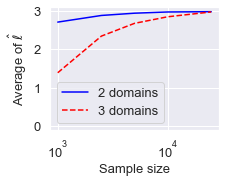

In [25]:
plot(nsamples_list, avg_number_shared2, avg_number_shared3,
                ylabel="Average of $\hat{\ell}$",
                path=f"experiments/results-paper/avg-shared-nodes_l={l}_d={d}_large.png", ylim=(-0.1,3.1))

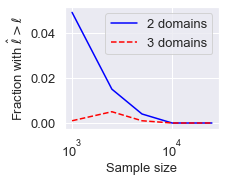

In [26]:
plot(nsamples_list, too_many_shared_rate2, too_many_shared_rate3,
                ylabel="Fraction with $\hat{\ell} > \ell$",
                path=f"experiments/results-paper/too-many-shared-nodes_l={l}_d={d}_large.png")

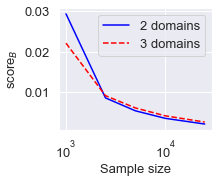

In [27]:
plot(nsamples_list, mixing_error_rate2, mixing_error_rate3,
                ylabel="score$_B$",
                path=f"experiments/results-paper/mixing-error_l={l}_d={d}_large.png")

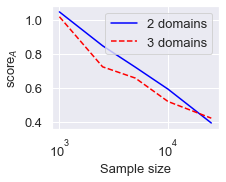

In [28]:
plot(nsamples_list, graph_error_median2, graph_error_median3,
                ylabel="score$_A$",
                path=f"experiments/results-paper/graph-error_l={l}_d={d}_large.png")